### Problem Statement :- 

#### Feature Transformation (Any one)

A. To use PCA Algorithm for dimensionality reduction.
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.
Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

B. Apply LDA Algorithm on Iris Dataset and classify which species a given flower
belongs to.
Dataset Link:https://www.kaggle.com/datasets/uciml/iris

In [1]:
# !pip install pandas
# !pip install -U scikit-learn
# !pip install -U matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('Wine.csv')

In [4]:
# Display the first few rows and basic information
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


**ai_message:**



Now that we have loaded and inspected the data, let's proceed with applying PCA for dimensionality reduction. We'll standardize the features, apply PCA, and visualize the results.

In [6]:
# Separate features and target
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

In [7]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [11]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

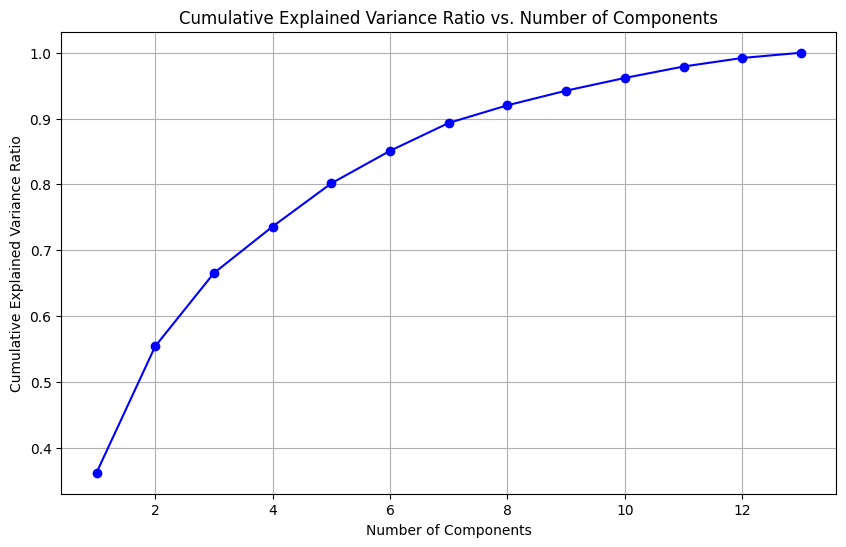

In [12]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [13]:
# Print the explained variance ratio for each component
print("Explained variance ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained variance ratio for each component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


In [14]:
# Select the first two principal components for visualization
X_pca_2d = X_pca[:, :2]

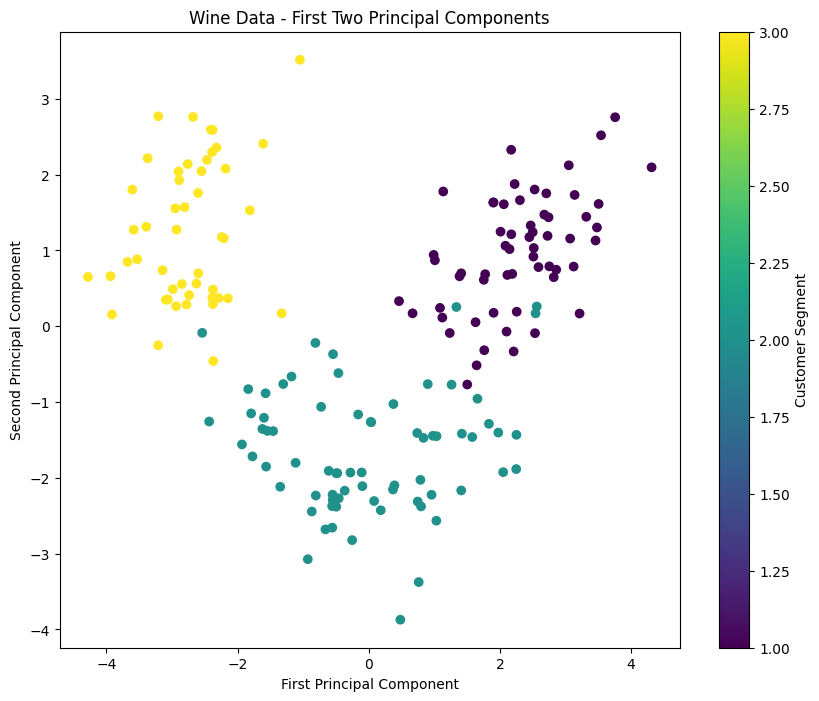

In [18]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Data - First Two Principal Components')
plt.colorbar(scatter, label='Customer Segment')
plt.show()

In [16]:
# Print the feature importance (loadings) for the first two principal components
feature_names = X.columns
loadings = pd.DataFrame(
    pca.components_.T[:, :2],
    columns=['PC1', 'PC2'],
    index=feature_names
)

In [ ]:
print("\nFeature loadings for the first two principal components:")
print(loadings)


Based on the PCA analysis of the wine dataset, here are the key findings:

1. Cumulative Explained Variance:

This plot shows how much of the total variance in the data is explained by each principal component. We can see that:
- The first two principal components (PC1 and PC2) together explain about 55% of the total variance.
- To capture 80% of the variance, we would need about 5-6 principal components.

2. Explained Variance Ratio:
The explained variance ratio for each component shows how much of the total variance is explained by each principal component:

PC1 explains 36.20% of the variance, while PC2 explains 19.21%. Together, they account for 55.41% of the total variance in the data.

3. Visualization of First Two Principal Components:

This scatter plot shows the wine samples projected onto the first two principal components. Each point represents a wine sample, and the color represents the customer segment (which likely corresponds to different types of wine). We can observe some separation between the clusters, indicating that these two components can help distinguish between different wine types to some extent.

4. Feature Loadings:

These loadings show how much each original feature contributes to PC1 and PC2. Some observations:

- PC1 is most strongly influenced by Total_Phenols (positive), Malic_Acid (negative), and Ash_Alcanity (negative).
- PC2 is most strongly influenced by Alcohol (negative), Ash (negative), and Magnesium (negative).

In conclusion, the PCA analysis has successfully reduced the dimensionality of the wine dataset. The first two principal components capture more than half of the total variance in the data and show some ability to distinguish between different wine types. To capture more of the variance, you might consider using 3-5 principal components, depending on your specific needs for dimensionality reduction and information retention.

This analysis provides a good starting point for further exploration and modeling of the wine dataset, allowing you to focus on the most important features that contribute to the differences between wine types.

Explained variance ratio for each component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


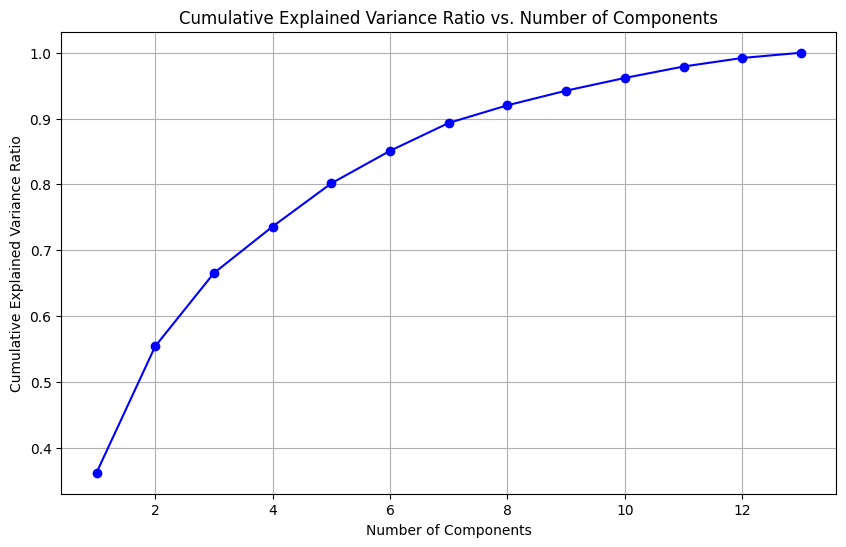

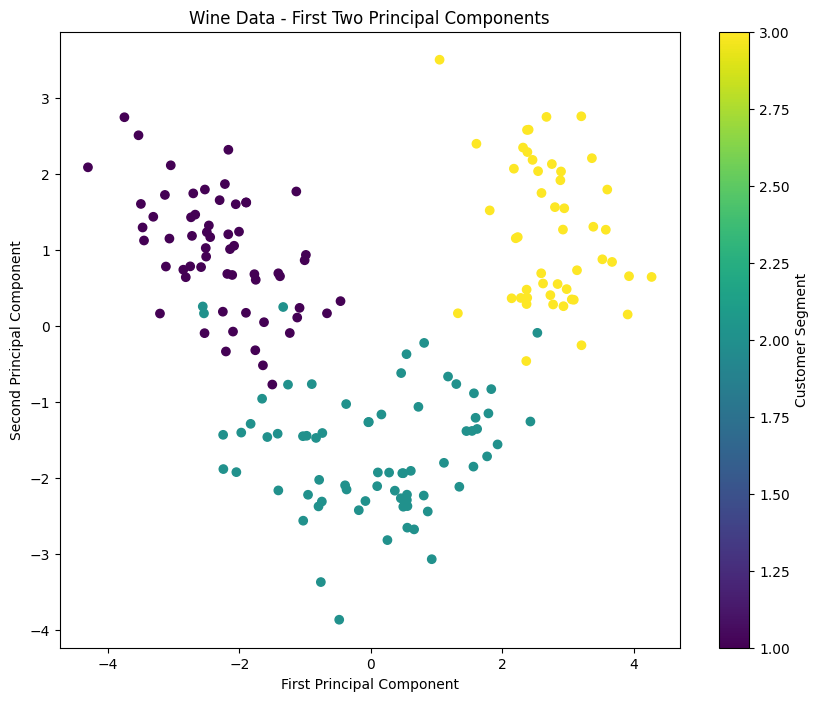


Feature loadings for the first two principal components:
                           PC1       PC2
Alcohol              -0.144329  0.483652
Malic_Acid            0.245188  0.224931
Ash                   0.002051  0.316069
Ash_Alcanity          0.239320 -0.010591
Magnesium            -0.141992  0.299634
Total_Phenols        -0.394661  0.065040
Flavanoids           -0.422934 -0.003360
Nonflavanoid_Phenols  0.298533  0.028779
Proanthocyanins      -0.313429  0.039302
Color_Intensity       0.088617  0.529996
Hue                  -0.296715 -0.279235
OD280                -0.376167 -0.164496
Proline              -0.286752  0.364903

Explanation of each step:
1. Load and prepare data: We load the Wine.csv file and separate features (X) from the target variable (y).
2. Standardize features: We subtract the mean and divide by the standard deviation for each feature.
3. Calculate covariance matrix: We compute the covariance matrix of the standardized features.
4. Calculate eigenvectors and eigenva

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and prepare the data
df = pd.read_csv('Wine.csv')
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

# Step 2: Standardize the features
def standardize(X):
    return (X - X.mean()) / X.std()

X_std = standardize(X)

# Step 3: Calculate the covariance matrix
def calc_covariance_matrix(X):
    return np.cov(X.T)

cov_matrix = calc_covariance_matrix(X_std)

# Step 4: Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvectors by decreasing eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 6: Calculate explained variance ratio
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Step 7: Project data onto principal components
def project_data(X, eigenvectors, n_components):
    return np.dot(X, eigenvectors[:, :n_components])

X_pca = project_data(X_std, eigenvectors, 2)

# Print explained variance ratio for each component
print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Data - First Two Principal Components')
plt.colorbar(scatter, label='Customer Segment')
plt.show()

# Print feature loadings for the first two principal components
feature_names = X.columns
loadings = pd.DataFrame(
    eigenvectors[:, :2],
    columns=['PC1', 'PC2'],
    index=feature_names
)
print("\nFeature loadings for the first two principal components:")
print(loadings)

# Explanation of each step
print("\nExplanation of each step:")
print("1. Load and prepare data: We load the Wine.csv file and separate features (X) from the target variable (y).")
print("2. Standardize features: We subtract the mean and divide by the standard deviation for each feature.")
print("3. Calculate covariance matrix: We compute the covariance matrix of the standardized features.")
print("4. Calculate eigenvectors and eigenvalues: We use numpy's linalg.eig function to compute eigenvectors and eigenvalues of the covariance matrix.")
print("5. Sort eigenvectors: We sort eigenvectors in descending order of their corresponding eigenvalues.")
print("6. Calculate explained variance ratio: We divide each eigenvalue by the sum of all eigenvalues to get the proportion of variance explained by each principal component.")
print("7. Project data: We multiply the standardized data by the sorted eigenvectors to get the principal components.")



1. **Load and Prepare Data**: We load the `Wine.csv` file and separate features (X) from the target variable (y).

2. **Standardize Features**: We subtract the mean and divide by the standard deviation for each feature to standardize the data.

3. **Calculate Covariance Matrix**: We compute the covariance matrix of the standardized features.

4. **Calculate Eigenvectors and Eigenvalues**: We use NumPy's `linalg.eig` function to compute eigenvectors and eigenvalues of the covariance matrix.

5. **Sort Eigenvectors**: We sort eigenvectors in descending order of their corresponding eigenvalues.

6. **Calculate Explained Variance Ratio**: We divide each eigenvalue by the sum of all eigenvalues to get the proportion of variance explained by each principal component.

7. **Project Data**: We multiply the standardized data by the sorted eigenvectors to get the principal components.